In [2]:
#Creating Dataset
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

First five rows and col values 
X1 : 
 [[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]  
 y1 :
 [ 1  1  1  1 -1]


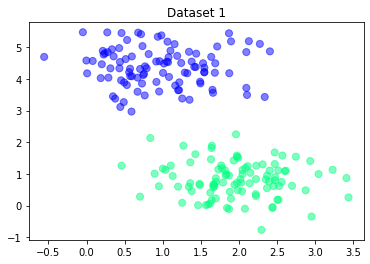

In [3]:
#X1 Using make_blobs
X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X1[:5], " \n y1 :\n",y1[:5])
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 1")
plt.show()

First five rows and col values 
X2 : 
 [[ 0.44890653  0.87556698]
 [ 0.20978751  0.98394892]
 [ 1.93801154  0.48911838]
 [ 1.85352657  0.19020391]
 [ 0.88158265 -0.55977905]]  
 y2 :
 [ 1  1  1  1 -1]


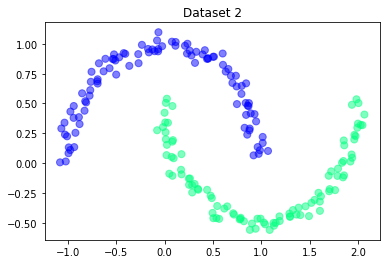

In [4]:
#X2 Using make_moons
X2, y2 = make_moons(n_samples=200, noise=.05)
y2 = np.where(y2 <= 0, -1, 1)
print("First five rows and col values \nX2 : \n",X2[:5], " \n y2 :\n",y1[:5])
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 2")
plt.show()

First five rows and col values 
X1 : 
 [[ 0.33440625  0.99720683]
 [ 0.31959387 -0.36463383]
 [ 0.40779037 -0.36331178]
 [ 0.41003353  0.01797919]
 [-0.36024189 -0.95647247]]  
 y3 :
 [ 1  1  1  1 -1]


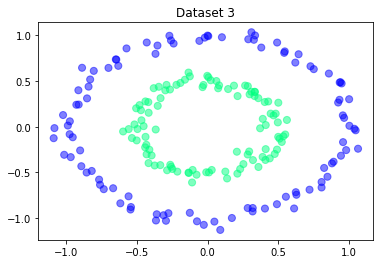

In [5]:
#X3 Using make_circles
X3, y3 = noisy_circles = make_circles(n_samples=200, factor=.5, noise=.05)
y3 = np.where(y3 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X3[:5], " \n y3 :\n",y1[:5])
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 3")
plt.show()

In [6]:
#Generating SVM soft Margin
class SVM_soft_margin:

    def __init__(self, alpha = 0.001, lambda_ = 0.01, n_iterations = 1000):
        self.alpha = alpha # learning rate
        self.lambda_ = lambda_ # tradeoff
        self.n_iterations = n_iterations # number of iterations
        self.w = None # weights or slopes
        self.b = None # intercept


    def fit(self, X, y):
        
        n_samples, n_features = X.shape        
        self.w = np.zeros(n_features) # initalizing with 0
        self.b = 0 # initializewith 0
        
        for iteration in range(self.n_iterations):
            for i, Xi in enumerate(X):
                # yixiw-b≥1
                if y[i] * (np.dot(Xi, self.w) - self.b) >= 1 : 
                    self.w -= self.alpha * (2 * self.lambda_ * self.w) # w = w + α* (2λw - yixi)
                else:
                    self.w -= self.alpha * (2 * self.lambda_ * self.w - np.dot(Xi, y[i])) # w = w + α* (2λw - yixi)
                    self.b -= self.alpha * y[i] # b = b - α* (yi)
        return self.w, self.b


    def predict(self, X):
        pred = np.dot(X, self.w) - self.b 
        result = [1 if val > 0 else -1 for val in pred] # returning in the form of -1 and 1
        return result

In [8]:
def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

In [10]:
def plot_svm(X, y, w, b, title ='Plot for linear SVM'):    

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])
    
    plt.title(title)
    plt.show()

For dataset 1, score: 1.0


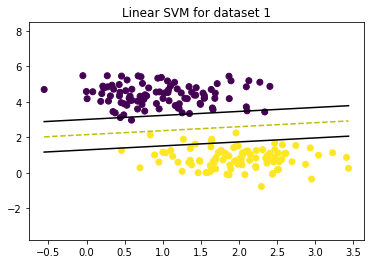

In [12]:
#Implementing into each Datasets
svm1 = SVM_soft_margin()
w1,b1 = svm1.fit(X1,y1)
print("For dataset 1, score:" ,accuracy_score(svm1.predict(X1),y1))
plot_svm(X1, y1, w1, b1, title= 'Linear SVM for dataset 1')

For dataset 2, score: 0.87


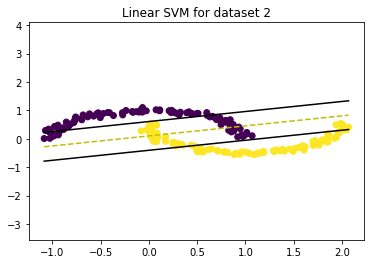

In [13]:
svm2 = SVM_soft_margin()
w2,b2 = svm2.fit(X2,y2)
print("For dataset 2, score:" ,accuracy_score(svm2.predict(X2),y2))
plot_svm(X2, y2, w2, b2, title= 'Linear SVM for dataset 2')

For dataset 3, score: 0.51


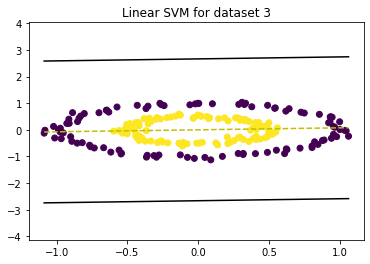

In [14]:
svm3 = SVM_soft_margin()
w3,b3 = svm3.fit(X3,y3)
print("For dataset 3, score:" ,accuracy_score(svm3.predict(X3),y3))
plot_svm(X3, y3, w3, b3, title= 'Linear SVM for dataset 3')